In [1]:
import matplotlib.pyplot as plt
import healpy as hp
import sys
sys.path.append('..')

In [2]:
import os
libdir = os.path.join(os.environ['SCRATCH'],'ECHO')

In [3]:
%load_ext autoreload
%autoreload 2
from echolens import simulation

[login33:1190402] shmem: mmap: an error occurred while determining whether or not /tmp/ompi.login33.80446/jf.0/1908539392/shared_mem_cuda_pool.login33 could be created.
[login33:1190402] create_and_attach: unable to create shared memory BTL coordinating structure :: size 134217728 


In [4]:
cmbmap = simulation.CMBlensed(libdir=libdir)
noisemap = simulation.GaussianNoiseMap()

In [12]:
alms_signal = cmbmap.get_lensed_alms(1)


alm2lenmap: using 256 nthreads
  build angles <- synthesis (GRAD_ONLY):  [0:00:08.224271] (35.3%)  
  build angles <- th-phi-gm (ducc)     :  [0:00:00.513668] (2.2%)  
  build_angles                         :  [0:00:08.737989] (37.5%)  
  synthesis general (STANDARD)         :  [0:00:04.266484] (18.3%)  
  gclm2lenmap                          :  [0:00:23.228417] (99.6%)  
  synthesis general (GRAD_ONLY)        :  [0:00:10.135753] (43.5%)  
  polrot (ducc)                        :  [0:00:00.088124] (0.4%)  
  Total                                :  [0:00:23.320376] d:h:m:s:mus


In [13]:
alms_noise = noisemap.noise_alm_idx(0)

In [14]:
cmbspectra = simulation.CMBspectra()
noisespec = simulation.NoiseSpectra()

In [15]:
cl_len = cmbspectra.get_lensed_spectra(dl=False)
cl_nt = noisespec.noise_T()
cl_np = noisespec.noise_P()

In [16]:
tlm,elm,blm = alms_signal

In [17]:
which = 0
tlm_n,elm_n,blm_n = alms_noise

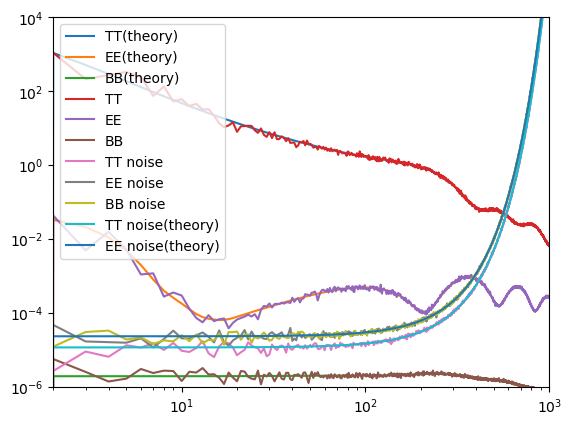

In [18]:
plt.loglog(cl_len['tt'], label='TT(theory)')
plt.loglog(cl_len['ee'], label='EE(theory)')
plt.loglog(cl_len['bb'], label='BB(theory)')
plt.loglog(hp.alm2cl(tlm), label='TT')
plt.loglog(hp.alm2cl(elm), label='EE')
plt.loglog(hp.alm2cl(blm), label='BB')
plt.loglog(hp.alm2cl(tlm_n), label='TT noise')
plt.loglog(hp.alm2cl(elm_n), label='EE noise')
plt.loglog(hp.alm2cl(blm_n), label='BB noise')
plt.loglog(cl_nt[which], label='TT noise(theory)')
plt.loglog(cl_np[which], label='EE noise(theory)')
plt.xlim(2, 1000)
plt.ylim(1e-6, 1e4)
plt.legend()